In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import glob
import os

This is a stock market dataset in which you have to :

    1. Collect various stock data : data collection 

## 1. Data Collection

In [3]:
# Path to your folder with CSVs
folder_path = r'C:\Users\mayur\Downloads\Udaanous\11-04-2025\individual_stocks_5yr'


# List all CSV files in the folder
csv_files = glob.glob(os.path.join(folder_path, '*.csv'))

# Load them into a list of DataFrames
dfs = [pd.read_csv(file) for file in csv_files]

# Optionally combine them into a single DataFrame
combined_df = pd.concat(dfs, ignore_index=True)

In [4]:
dfs

[            date   open   high    low  close    volume Name
 0     2013-02-08  15.07  15.12  14.63  14.75   8407500  AAL
 1     2013-02-11  14.89  15.01  14.26  14.46   8882000  AAL
 2     2013-02-12  14.45  14.51  14.10  14.27   8126000  AAL
 3     2013-02-13  14.30  14.94  14.25  14.66  10259500  AAL
 4     2013-02-14  14.94  14.96  13.16  13.99  31879900  AAL
 ...          ...    ...    ...    ...    ...       ...  ...
 1254  2018-02-01  54.00  54.64  53.59  53.88   3623078  AAL
 1255  2018-02-02  53.49  53.99  52.03  52.10   5109361  AAL
 1256  2018-02-05  51.99  52.39  49.75  49.76   6878284  AAL
 1257  2018-02-06  49.32  51.50  48.79  51.18   6782480  AAL
 1258  2018-02-07  50.91  51.98  50.89  51.40   4845831  AAL
 
 [1259 rows x 7 columns],
             date      open      high       low     close     volume  Name
 0     2013-02-08   67.7142   68.4014   66.8928   67.8542  158168416  AAPL
 1     2013-02-11   68.0714   69.2771   67.6071   68.5614  129029425  AAPL
 2     2013-02-

In [5]:
combined_df.head(10)

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL
5,2013-02-15,13.93,14.61,13.93,14.50,15628000,AAL
6,2013-02-19,14.33,14.56,14.08,14.26,11354400,AAL
7,2013-02-20,14.17,14.26,13.15,13.33,14725200,AAL
8,2013-02-21,13.62,13.95,12.90,13.37,11922100,AAL
9,2013-02-22,13.57,13.60,13.21,13.57,6071400,AAL


In [6]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619040 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    619040 non-null  object 
 1   open    619029 non-null  float64
 2   high    619032 non-null  float64
 3   low     619032 non-null  float64
 4   close   619040 non-null  float64
 5   volume  619040 non-null  int64  
 6   Name    619040 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 33.1+ MB


In [7]:
combined_df.isnull().sum()

date       0
open      11
high       8
low        8
close      0
volume     0
Name       0
dtype: int64

**Impute Missing values by Simple Imputer**

In [8]:
from sklearn.impute import SimpleImputer   

# Initialize imputer with median strategy

imputer = SimpleImputer(strategy='mean')           

    
# Apply imputer to the DataFrame

combined_df[['open', 'high', 'low']] = imputer.fit_transform(combined_df[['open', 'high', 'low']])



In [9]:
combined_df.isnull().sum()

date      0
open      0
high      0
low       0
close     0
volume    0
Name      0
dtype: int64

In [10]:
combined_df.head(10)

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL
5,2013-02-15,13.93,14.61,13.93,14.50,15628000,AAL
6,2013-02-19,14.33,14.56,14.08,14.26,11354400,AAL
7,2013-02-20,14.17,14.26,13.15,13.33,14725200,AAL
8,2013-02-21,13.62,13.95,12.90,13.37,11922100,AAL
9,2013-02-22,13.57,13.60,13.21,13.57,6071400,AAL


In [11]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619040 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    619040 non-null  object 
 1   open    619040 non-null  float64
 2   high    619040 non-null  float64
 3   low     619040 non-null  float64
 4   close   619040 non-null  float64
 5   volume  619040 non-null  int64  
 6   Name    619040 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 33.1+ MB


**Convert date Column to datetime**

In [12]:
combined_df['date'] = pd.to_datetime(combined_df['date'])


In [13]:
combined_df['month'] = combined_df['date'].dt.month_name()

combined_df['year'] = combined_df['date'].dt.year

In [14]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619040 entries, 0 to 619039
Data columns (total 9 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    619040 non-null  datetime64[ns]
 1   open    619040 non-null  float64       
 2   high    619040 non-null  float64       
 3   low     619040 non-null  float64       
 4   close   619040 non-null  float64       
 5   volume  619040 non-null  int64         
 6   Name    619040 non-null  object        
 7   month   619040 non-null  object        
 8   year    619040 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(2), object(2)
memory usage: 42.5+ MB


## 2. Data Analysis

**How many unique companies?**

In [15]:
combined_df[['Name']]

,Name
0,AAL
1,AAL
2,AAL
3,AAL
4,AAL
...,...
619035,ZTS
619036,ZTS
619037,ZTS
619038,ZTS


In [16]:
combined_df['Name'].nunique()

505

In [17]:
combined_df['Name'].unique()

array(['AAL', 'AAPL', 'AAP', 'ABBV', 'ABC', 'ABT', 'ACN', 'ADBE', 'ADI',
       'ADM', 'ADP', 'ADSK', 'ADS', 'AEE', 'AEP', 'AES', 'AET', 'AFL',
       'AGN', 'AIG', 'AIV', 'AIZ', 'AJG', 'AKAM', 'ALB', 'ALGN', 'ALK',
       'ALLE', 'ALL', 'ALXN', 'AMAT', 'AMD', 'AME', 'AMGN', 'AMG', 'AMP',
       'AMT', 'AMZN', 'ANDV', 'ANSS', 'ANTM', 'AON', 'AOS', 'APA', 'APC',
       'APD', 'APH', 'APTV', 'ARE', 'ARNC', 'ATVI', 'AVB', 'AVGO', 'AVY',
       'AWK', 'AXP', 'AYI', 'AZO', 'A', 'BAC', 'BAX', 'BA', 'BBT', 'BBY',
       'BDX', 'BEN', 'BF.B', 'BHF', 'BHGE', 'BIIB', 'BK', 'BLK', 'BLL',
       'BMY', 'BRK.B', 'BSX', 'BWA', 'BXP', 'CAG', 'CAH', 'CAT', 'CA',
       'CBG', 'CBOE', 'CBS', 'CB', 'CCI', 'CCL', 'CDNS', 'CELG', 'CERN',
       'CFG', 'CF', 'CHD', 'CHK', 'CHRW', 'CHTR', 'CINF', 'CI', 'CLX',
       'CL', 'CMA', 'CMCSA', 'CME', 'CMG', 'CMI', 'CMS', 'CNC', 'CNP',
       'COF', 'COG', 'COL', 'COO', 'COP', 'COST', 'COTY', 'CPB', 'CRM',
       'CSCO', 'CSRA', 'CSX', 'CTAS', 'CTL', 'CTSH', 'CTXS

In [18]:
combined_df['date'].min(), combined_df['date'].max()

(Timestamp('2013-02-08 00:00:00'), Timestamp('2018-02-07 00:00:00'))

---------


    2. Analysing change in price of the stock overtime 

    3. Analysing moving average of the various stocks

    4. observe closing price change in apple stock

In [19]:
combined_df.head(10)

,date,open,high,low,close,volume,Name,month,year
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL,February,2013
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL,February,2013
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL,February,2013
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL,February,2013
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL,February,2013
5,2013-02-15,13.93,14.61,13.93,14.50,15628000,AAL,February,2013
6,2013-02-19,14.33,14.56,14.08,14.26,11354400,AAL,February,2013
7,2013-02-20,14.17,14.26,13.15,13.33,14725200,AAL,February,2013
8,2013-02-21,13.62,13.95,12.90,13.37,11922100,AAL,February,2013
9,2013-02-22,13.57,13.60,13.21,13.57,6071400,AAL,February,2013


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 1. Analyse change of price in Stock overtime

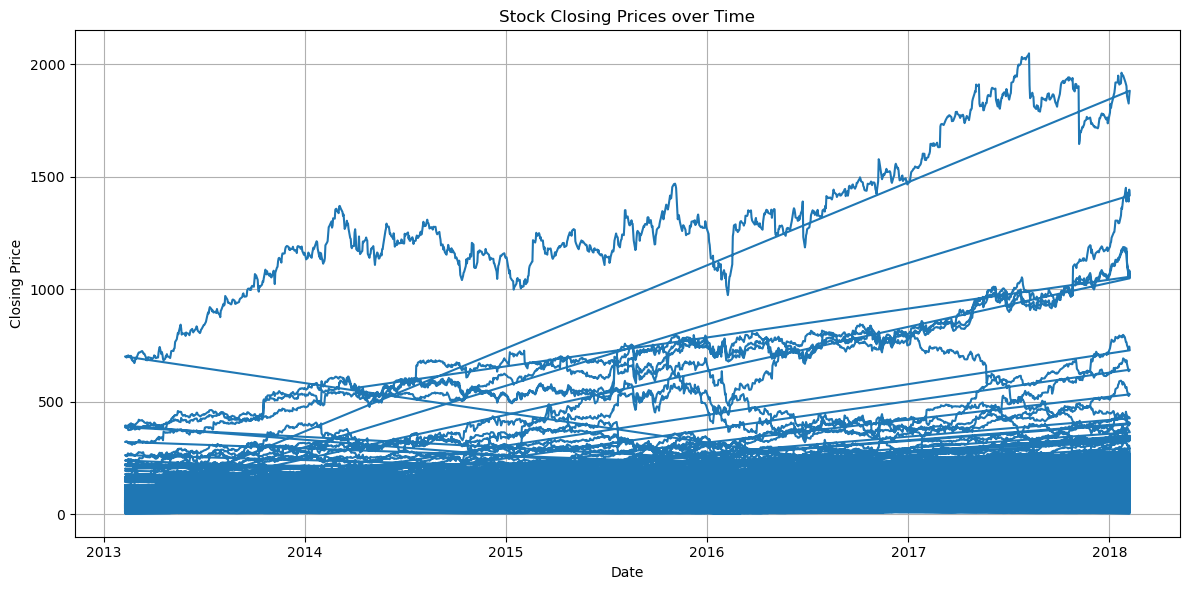

In [35]:
# Plot : Line chart of Bitcoin closing prices over time

plt.figure(figsize=(12, 6))
plt.plot(combined_df['date'], combined_df['close'])
plt.title('Stock Closing Prices over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.grid(True)
plt.tight_layout()
plt.show()



## 2. Analysing Stock prices using candle stick chart



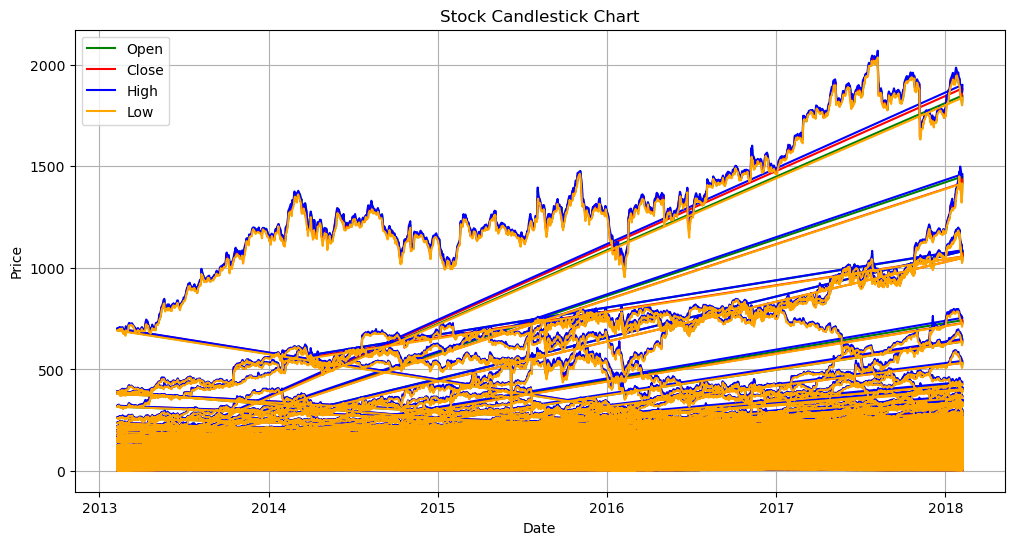

In [37]:
# Plot : Candlestick chart of Bitcoin prices

plt.figure(figsize=(12, 6))
plt.plot(combined_df['date'], combined_df['open'], color='green', label='Open')
plt.plot(combined_df['date'], combined_df['close'], color='red', label='Close')
plt.plot(combined_df['date'], combined_df['high'], color='blue', label='High')
plt.plot(combined_df['date'], combined_df['low'], color='orange', label='Low')
plt.title('Stock Candlestick Chart')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

### 3. Analysing closing price in depth



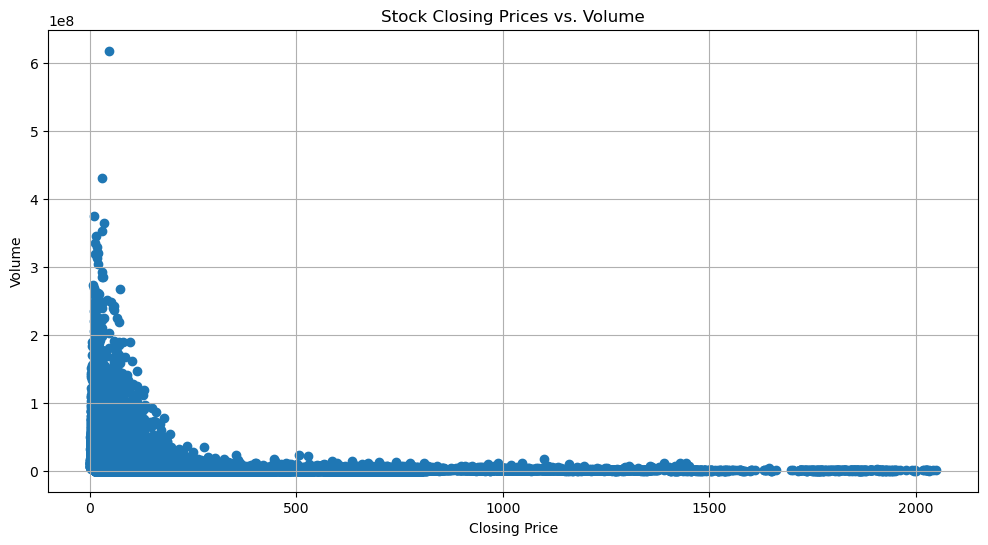

In [39]:
# Plot : Scatter plot of Bitcoin closing prices and volume

plt.figure(figsize=(12, 6))
plt.scatter(combined_df['close'], combined_df['volume'])
plt.title('Stock Closing Prices vs. Volume')
plt.xlabel('Closing Price')
plt.ylabel('Volume')
plt.grid(True)
plt.show()

## 4. Analysing moving average of the various stocks

import matplotlib.pyplot as plt

def plot_moving_averages(stock_name):
    stock_df = combined_df[combined_df['Name'] == stock_name].copy()
    stock_df['date'] = pd.to_datetime(stock_df['date'])
    stock_df.sort_values('date', inplace=True)

    # Calculate MAs
    stock_df['MA20'] = stock_df['close'].rolling(window=20).mean()
    stock_df['MA50'] = stock_df['close'].rolling(window=50).mean()

    # Plot
    plt.figure(figsize=(12, 5))
    plt.plot(stock_df['date'], stock_df['close'], label='Close Price', color='blue')
    plt.plot(stock_df['date'], stock_df['MA20'], label='MA20', color='green')
    plt.plot(stock_df['date'], stock_df['MA50'], label='MA50', color='red')
    plt.title(f'{stock_name} Close Price with Moving Averages')
    plt.xlabel('Date')
    plt.ylabel('Price ($)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    
for stock in combined_df['Name'].unique():
    plot_moving_averages(stock)


### 5. Closing price change in apple stock

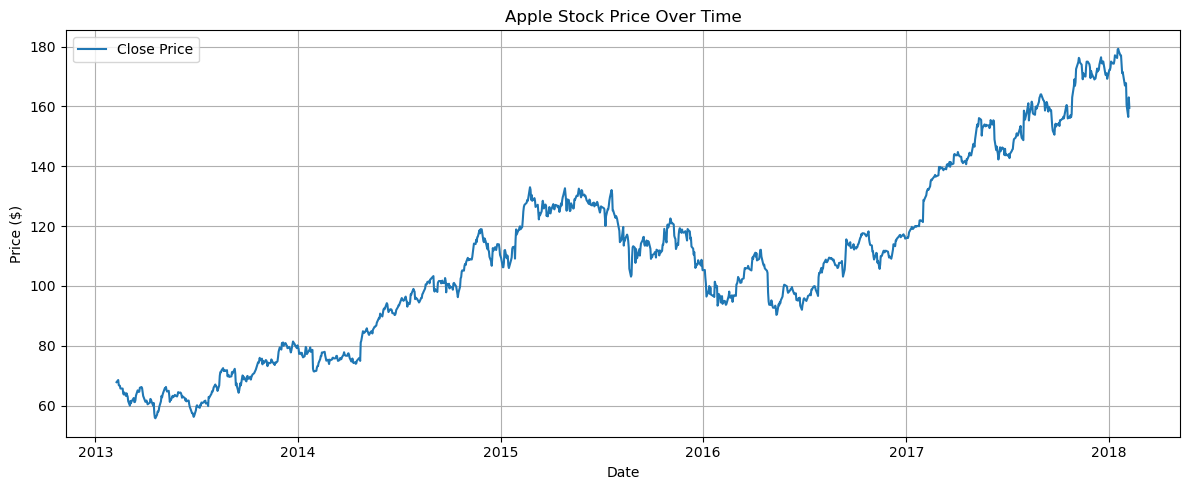

In [22]:
apple_df = combined_df[combined_df['Name'] == 'AAPL']

plt.figure(figsize=(12, 5))
plt.plot(apple_df['date'], apple_df['close'], label='Close Price')
plt.title('Apple Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Volume Traded Over Time

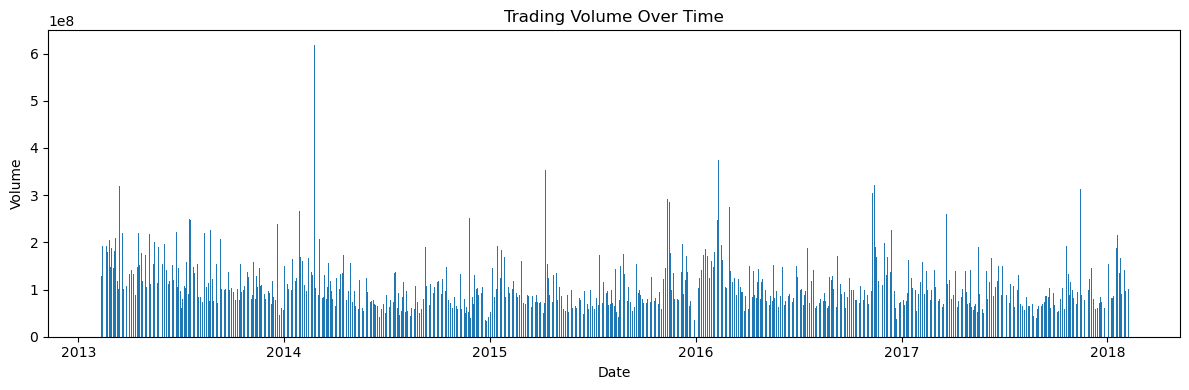

In [41]:
plt.figure(figsize=(12, 4))
plt.bar(combined_df['date'], combined_df['volume'])
plt.title('Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.tight_layout()
plt.show()
